 Preprocessing Steps

Import Libraries,
Configure Settings,
Import Files,
Prepare Data

Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math

Configure Settings

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

Import Files

In [3]:
df_raw_15=pd.read_csv('/content/drive/MyDrive/2015 (1).csv')
df_raw_16=pd.read_csv('/content/drive/MyDrive/2016.csv')
df_raw_17=pd.read_csv('/content/drive/MyDrive/2017.csv')
df_raw_18=pd.read_csv('/content/drive/MyDrive/2018.csv')
df_raw_19=pd.read_csv('/content/drive/MyDrive/2019.csv')

In [16]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


Prepare Data

In [20]:
df['Country or region'].unique()

array(['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands',
       'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria',
       'Australia', 'Costa Rica', 'Israel', 'Luxembourg',
       'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States',
       'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico',
       'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar',
       'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador',
       'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland',
       'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua',
       'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait',
       'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica',
       'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia',
       'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal',
       'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya',
       'Montenegro', 'Tajikis

In [21]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df['Country or region'] = le.fit_transform(df['Country or region'])

In [22]:
df['Country or region'].unique()

array([ 43,  36, 105,  57,  98, 133, 132,  99,  23,   6,   5,  32,  63,
        81, 147,  62,  48,  11, 148,  35, 146,  86,  89,  44, 135,  26,
        51, 118, 114, 129, 108,  17, 149, 122,  40,  64,   8, 123, 140,
       112, 150,  80,  28, 124, 100,  71,   3, 115,  34,  38,  72, 138,
        75, 127,  41,  66,  88,  67,  54,  69,  14,  56, 109, 104, 110,
       113, 106, 116, 111, 120,  90,  79,  92, 136,  33,  55,  37,  15,
       142,  84,  10,  50,  91, 103, 102,  73, 143,   2,  93,   7,  76,
        59,  27, 152,  13,  22,  18,  49,  65,  97,  68,  12,  30,  45,
        74, 126,   1, 151,  21, 107, 119, 125,  96, 101,  19,   4,  60,
        52,  47,  46,  70,  87,  94, 141,   9,  61,  31,  85, 121, 130,
        95,  25, 145,  42, 131, 144,  39, 154, 139,  58,  78,  29,  82,
        77,  20, 155,  53,  16, 134,  83, 153, 117, 137,   0,  24, 128])

Structure Investigation

Basic Steps,
Null Value Check,
Structure of non-numerical features,
Structure of numerical features

In [9]:
df.shape

(156, 9)

In [10]:
df.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [25]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df, test_size=0.20)

In [26]:
train_x = train.drop(['GDP per capita'], axis = 1)
train_y = train['Healthy life expectancy']             

val_x = val.drop(['GDP per capita'], axis = 1)
val_y = val['Healthy life expectancy']

In [27]:
from sklearn.linear_model import LinearRegression
ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_train_predict = ln_reg.predict(train_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_train_predict, train_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_train_predict, train_y))
print('R_Squared Score of linear regression:', r2_score( train_y,df_train_predict))

Mean Absolute Error of linear regression: 5.208048216629944e-14
Mean Square Error of linear regression: 3.655769771474622e-27
R_Squared Score of linear regression: 1.0


In [28]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score( val_y,df_pred))

Mean Absolute Error of linear regression: 5.999541141665787e-14
Mean Square Error of linear regression: 4.6384236410543156e-27
R_Squared Score of linear regression: 1.0


And we are going to create our features (the GDP per capita in variable X) and our labels (Healthy Life expectancy in variable Y)


country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats[“GDP per capita”]]
y = np.c_[country_stats[“Healthy Life expectancy”]]

In [ ]:
df.head

In [ ]:
df.info()

In [ ]:
pd.value_counts(df.dtypes)

No Null Values Detected

In [ ]:
# Combined Plot

plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

Structure of non-numerical features Only 1 non numerical column Column value is nominal type has all distinct values

In [ ]:
# non-numerical features
df.select_dtypes(exclude="number").head()

In [ ]:
df.describe(exclude="number")

Structure of numerical features

In [ ]:
# Combined Plot

plt.subplots(2,2,figsize=(10,8),squeeze=False)
plt.subplot(2,2,1)
df.nunique().sort_values().plot.bar(  title="Unique values per feature (Normal Scale)")
plt.subplot(2,2,2)
df.nunique().sort_values().plot.bar( logy=True, title="Unique values per feature (Log Scale)")

plt.subplot(2,2,3)
df.select_dtypes(include="number").nunique().sort_values().plot.bar(title="Unique values per Numerical feature");
plt.subplot(2,2,4)
df.select_dtypes(exclude="number").nunique().sort_values().plot.bar(title="Unique values per Categorical feature");
plt.tight_layout()
plt.show()

Value Behaviour 

Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature.The y-axis shows the feature value, while the x-axis is the sample index
Observation
Values in each subpots appear to be in rangeNo extreme values / Wrong Value observed

In [ ]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=1)
plt.tight_layout()

Univariate Content Analysis


Summary for Columns (Describe)3.1 Summary for Columns (Describe),Individual Column Shape Observation,
Individual Column Value Observation (Min, Max and Outlier)

In [ ]:
df.describe()

Individual Column Shape

Approximately symmetricScoreGDP per capitaModerately SkewedHealthy life expectancy (Presence of low values causing left skewness)Freedom to make life choices (Presence of low values causing left skewness)Generosity (Presence of High values causing right skewness)Highly SkewedSocial support (Presence of low values causing left skewness)Perceptions of corruption (Presence of High values causing right skewness)

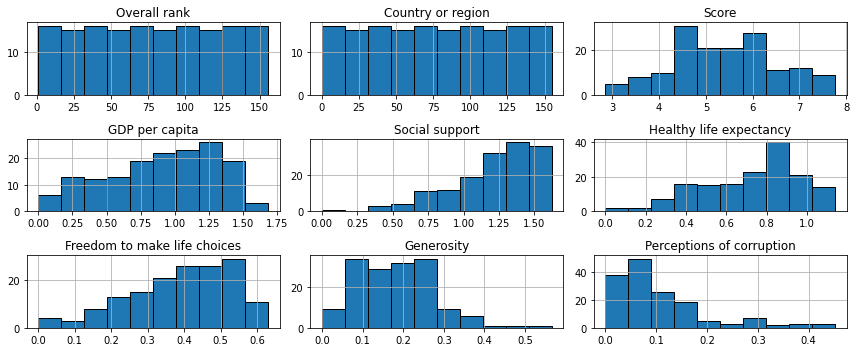

In [30]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,5)
layout_val=(-1, 3)
df.hist(bins=10, figsize=figsize_val, layout=layout_val, edgecolor="black")
plt.tight_layout();

In [31]:
df.skew()

Overall rank                    0.000000
Country or region               0.000000
Score                           0.011450
GDP per capita                 -0.385232
Social support                 -1.134728
Healthy life expectancy        -0.613841
Freedom to make life choices   -0.685636
Generosity                      0.745942
Perceptions of corruption       1.650410
dtype: float64

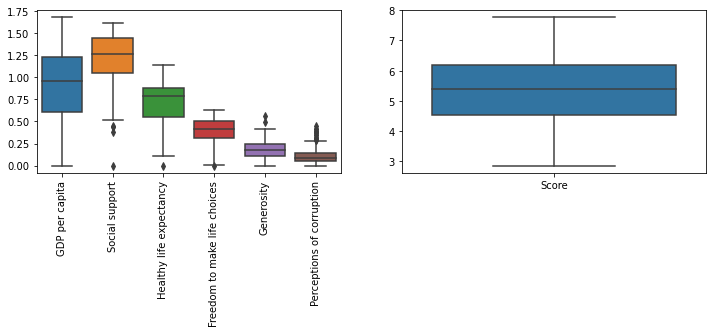

In [32]:
plt.subplots(1,2,figsize=(12,3))

plt.subplot(1,2,1)
sns.boxplot(data=df[[ 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']])
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.boxplot(data=df[[ 'Score']])

plt.show()

In [33]:
upper =df.quantile(0.75)+1.5 *(df.quantile(0.75)-df.quantile(0.25))
lower = df.quantile(0.25)-1.5 *(df.quantile(0.75)-df.quantile(0.25))

for i in [ 'GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption']:
    temp_min=df[df[i]== df[i].min()][['Country or region','Score']]
    temp_max=df[df[i]== df[i].max()][['Country or region','Score']]
    
    print('\nColumn -> ',i,'\nMin Value ->',temp_min['Score'].values[0],'| Country -> ',
          str(temp_min['Country or region'].to_list()).replace("'",'').replace('[','').replace(']',''))
    
    print('Max Value ->',temp_max['Score'].values[0],'| Country -> ',
          str(temp_max['Country or region'].to_list()).replace("'",'').replace('[','').replace(']',''))
    
    x= df[ (df[i]<round(lower[i],2)) |  (df[i]>round(upper[i],2))]['Country or region'].to_list()
    print('Outliers -> ',str(x).replace("'",'').replace('[','').replace(']',''))
    print('\n','*'*10)


Column ->  GDP per capita 
Min Value -> 4.668 | Country ->  125
Max Value -> 6.374 | Country ->  114
Outliers ->  

 **********

Column ->  Social support 
Min Value -> 3.083 | Country ->  24
Max Value -> 7.494 | Country ->  57
Outliers ->  12, 20, 134, 24

 **********

Column ->  Healthy life expectancy 
Min Value -> 4.212 | Country ->  131
Max Value -> 6.262 | Country ->  122
Outliers ->  131

 **********

Column ->  Freedom to make life choices 
Min Value -> 3.203 | Country ->  0
Max Value -> 6.174 | Country ->  150
Outliers ->  0

 **********

Column ->  Generosity 
Min Value -> 5.287 | Country ->  50
Max Value -> 4.36 | Country ->  95
Outliers ->  59, 95

 **********

Column ->  Perceptions of corruption 
Min Value -> 5.529 | Country ->  90
Max Value -> 6.262 | Country ->  122
Outliers ->  43, 36, 105, 98, 133, 132, 99, 23, 5, 81, 62, 122, 55, 117

 **********




Multivariate Investigation

Creating Relation Matrix and Graph,
Relation With Score

Creating Relation Matrix and Graph¶Keeping score out of the rank and score since strong correlation. (Score decides rank)

In [ ]:
temp_corr=df.corr()
temp_corr

In [ ]:
# Plot
plt.figure(figsize=(8,4))
sns.heatmap(df.corr().round(2), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
temp_corr.drop(columns='Overall rank',index='Overall rank',inplace=True)

In [ ]:
# Observing relationship type with corr values

df['Mask_Rank']=np.where(df['Overall rank']==1,'Rank 1','Other')
df['Mask_Rank']=np.where(df['Overall rank']==156,'Rank 156',df['Mask_Rank'])

sns.pairplot(data=df,
                  y_vars='Score',
                  x_vars=['GDP per capita', 'Social support', 'Healthy life expectancy','Freedom to make life choices',
                          'Generosity','Perceptions of corruption']
                ,hue='Mask_Rank'
)
                  
plt.show()


We can see first 3 plots show + relationship and points are also close enough (Seems to have strong relationship)Freedom to make life choices has a positive relationship but points are not closed enough indicating moderate relationshipGenerosity does not seems to have any relation (Even the least rank country has better generosity score then rank 1)cluster of few points seems to show +ve relationship thus week positive relation with score
In [25]:

In [ ]:
temp_corr_score=temp_corr.iloc[[0]]
#temp_corr_score.drop(columns='Score',inplace=True)

In [ ]:
# Observing relationship type with corr values

temp_corr_score.drop(columns='Score',inplace=True)
strong=[]
moderate=[]
weak=[]
no_relationship=[]
for y in temp_corr_score.columns:
    p=temp_corr_score[y][0]
    if p >= 0.75 or p <= -0.75:
        strong.append(y)
    elif p >= 0.50 or p <= -0.50:
        moderate.append(y)
    elif p >= 0.25 or p <= -0.25:
        weak.append(y)
    else :
        no_relationship.append(y)

In [ ]:
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)

In [ ]:
temp_corr=df.corr()
temp_corr.drop(columns=['Overall rank','Score'],index=['Overall rank','Score'],inplace=True)
res = [(a, b) for idx, a in enumerate(temp_corr.index) for b in temp_corr.index[idx + 1:]]

strong=[]
moderate=[]
weak=[]
no_relationship=[]
for x,y in res:
    p=temp_corr[x][y]
    if p >= 0.75 or p <= -0.75:
        strong.append((x,y))
    elif p >= 0.50 or p <= -0.50:
        moderate.append((x,y))
    elif p >= 0.25 or p <= -0.25:
        weak.append((x,y))
    else :
        no_relationship.append((x,y))
    
print('\nStrong -> ',strong)
print('\nModerate -> ',moderate)
print('\nWeak -> ',weak)
print('\nNo_relationship -> ',no_relationship)


Comparision Summary wrt Previous Reports:




Coutries Performance Comparision wrt 2018
Score Variation for Ranked 1 Country Over 5 year

Top 5 countries with most improved performance

Benin, Guinea, Niger, Kosovo, 'Bosnia and Herzegovina'


5 countries with worst performance:

Malaysia , Turkmenistan, Argentina, Sierra Leone and Egypt 




Countries with no change in rank:

Finland, Iceland, New Zealand, Malta, Singapore, Latvia, Jamaica, Kazakhstan, Peru, Hong Kong, Mozambique, Togo, Madagascar, Tanzania, Central African Republic

In [ ]:
temp_f=df_combined[df_combined['Year']=='2019'].merge(df_combined[df_combined['Year']=='2018'],left_on='Country', right_on='Country')
temp_f['Change']=temp_f['Rank_y']-temp_f['Rank_x']

In [ ]:
plt.figure(figsize=(25,4))
plt.vlines(x=temp_f['Country'], ymin=0, ymax=temp_f.Change,linestyles='dotted')

for i, val in enumerate(temp_f.Change):
    plt.text(i, val, val, horizontalalignment='right' if val < 0 else 'left', 
             verticalalignment='top', fontdict={'color':'red' if val < 0 else 'green','fontweight':300, 'size':9})

plt.xticks(rotation=90)
plt.margins(x=0.005,y=0.1)
plt.show()

In [ ]:
#Top 5 performing Countries
temp_f[['Country','Change']].sort_values('Change',ascending=False)[0:5].reset_index(drop=True)

In [ ]:
# Top 5 worst performing Countries
temp_f[['Country','Change']].sort_values('Change',)[0:5].reset_index(drop=True)

In [ ]:
# Consistent Countries with change 0
print(str(temp_f[temp_f['Change']==0]['Country'].to_list()).replace("'",'').replace('[','').replace(']',''))

Score Variation for Ranked 1 Country Over 5 year

In [ ]:
df_combined[df_combined['Rank']==1][['Year','Score']].plot.line(x='Year',y='Score',figsize=(10,3))
for i, val in enumerate((df_combined[df_combined['Rank']==1][['Year','Score','Country']].sort_values('Year')).astype(np.str).agg('-'.join, axis=1).to_list()):
    plt.text(i, float(val.split('-')[1]), (str(val.split('-')[2]),round(float(val.split('-')[1]),2)),
         horizontalalignment='left', verticalalignment='top', fontdict={'fontweight':300, 'size':8})
plt.margins(x=0.15,y=0.15)
plt.show()